<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana6/Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [59]:
f = lambda x: np.sin(x)
f = lambda x: x**2*np.exp(-x**2)
x = np.linspace(-2*np.pi,2*np.pi,50)
y = f(x)

/tmp/ipython-input-2870579373.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(x,y,'.-',marker='*',color='k')


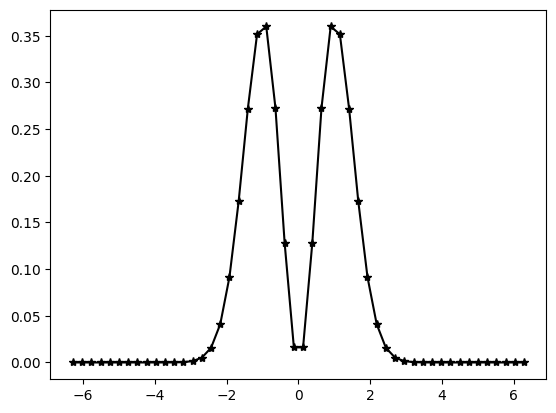

In [60]:
plt.plot(x,y,'.-',marker='*',color='k')

In [63]:
N = 10 # Controlamos el numero de trapecios
x1 = np.linspace(-2*np.pi, 2*np.pi, N+1)
y1 = f(x1)
yp = np.interp(x1,x1,y1)

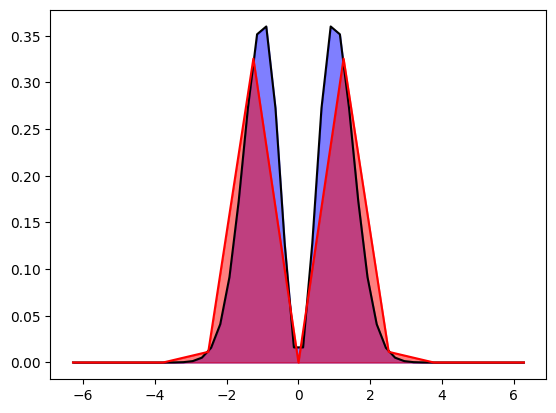

In [64]:
plt.plot(x,y,color='k')
plt.plot(x1,yp,color='r')
plt.fill_between(x,y,color='b',alpha=0.5)
plt.fill_between(x1,yp,color='r',alpha=0.5)
#plt.yscale('log')